## Sommaire

* [Étapes préliminaires](#chapter1)
    * [Importation des librairies](#section_1_1)
    * [Importation des données](#section_1_2)
* [Demandes d'Antoine](#chapter2)
    * [Chiffre d'affaires](#section_2_1)
        * [Chiffre d'affaires total et chiffre d'affaires moyen par mois](#section_2_1_1)
        * [Mois avec meilleurs et moins bons chiffres d'affaires](#section_2_1_2)
        * [Chiffre d'affaires par catégorie](#section_2_1_3)
        * [Évolution du chiffre d'affaires dans le temps](#section_2_1_4)
    * [Les produits](#section_2_2)
        * [Les tops et les flops](#section_2_2_1)
        * [Nombre de ventes et prix moyen par catégorie](#section_2_2_2)
        * [Répartition des produits vendues entre les clients](#section_2_2_3)
        * [Répartition du chiffre d'affaires entre les produits](#section_2_2_4)
    * [Profils des clients](#section_2_3)
        * [Genre des clients](#section_2_3_1)
        * [Age des clients](#section_2_3_2)
        * [Répartition du chiffre d'affaires entre les clients](#section_2_3_3)
* [Demandes de Julie](#chapter3)
    * [Genre d'un client X catégorie livres achetés](#section_3_1)
    * [Age X montant total des achats](#section_3_2)
    * [Age X fréquence d'achat](#section_3_3)
    * [Age X taille du panier moyen](#section_3_4)
    * [Age X catégorie des livres achetés](#section_3_5)
    * [Chiffre d'affaires X genre d'un client](#section_3_6)
* [Conclusion](#chapter4)

## Étapes préliminaires <a class="anchor" id="chapter1"></a>

### Importation des librairies <a class="anchor" id="section_1_1"></a>

In [1]:
# Manipulation des données
import pandas as pd
import numpy as np

# Représentation graphique
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# Tests statistiques 
from scipy import stats

### Importation des données <a class="anchor" id="section_1_2"></a>

In [2]:
df_final = pd.read_csv("C:/Users/jorda/P6/Data/df_final.csv", parse_dates=[3]) # df sans oct 2021 et sans les 4 gros clients
df_oct_in = pd.read_csv("C:/Users/jorda/P6/Data/df_oct_in.csv", parse_dates=[3]) # df avec oct 2021 et les 4 gros clients
df_4clients_in = pd.read_csv("C:/Users/jorda/P6/Data/df_4clients_in.csv", parse_dates=[3]) # df avec 4 gros clients et sans oct
products = pd.read_csv("C:/Users/jorda/P6/Data/products.csv", sep = ',')
df_products_nosale = pd.read_csv("C:/Users/jorda/P6/Data/df_products_nosale.csv", sep = ',')

## Demandes d'Antoine <a class="anchor" id="chapter2"></a>

### Chiffre d'affaires <a class="anchor" id="section_2_1"></a>

#### CA total et CA moyen par mois <a class="anchor" id="section_2_1_1"></a>

In [3]:
# Calcul du chiffre d'affaires total (avec le mois d'octobre 2021)
CA_total = df_oct_in['price'].sum()
print("Le chiffe d'affaires totale entre le", df_oct_in['date'].dt.date.min(), 
      "et le", df_oct_in['date'].dt.date.max(), "est de:", round(CA_total, 2), "€")
print(" ")

# Calcul du chiffre d'affaire moyen par mois 
ca_mois = df_4clients_in.groupby(df_4clients_in['date'].dt.to_period("M")).price.sum().reset_index(name ='CA')
ca_moyen = ca_mois['CA'].mean()
print("Le chiffe d'affaires moyen par mois est de:", round(ca_moyen, 2), "€")

Le chiffe d'affaires totale entre le 2021-03-01 et le 2023-02-28 est de: 11856321.63 €
 
Le chiffe d'affaires moyen par mois est de: 501540.9 €


#### Mois avec meilleurs et moins bons chiffres d'affaires <a class="anchor" id="section_2_1_2"></a>

In [4]:
# On trie par CA décroissant et on affiche les trois premiers mois
print("Mois avec CA le plus élevé:")
print(ca_mois.sort_values(by='CA', ascending=False).head(3))
print(" ")
print("----------------------------")
# On trie par CA croissant et on affiche les trois premiers mois
print("Mois avec CA le plus faible:")
print(ca_mois.sort_values(by='CA', ascending=True).head(3))

Mois avec CA le plus élevé:
       date             CA
10  2022-02  535700.560741
8   2021-12  525999.409562
9   2022-01  525397.653973
 
----------------------------
Mois avec CA le plus faible:
       date             CA
22  2023-02  456761.889562
1   2021-04  476273.559125
5   2021-08  482390.385152


Les plus gros chiffres d'affaires ont été réalisés durant les mois de décembre 2021 et janvier et février 2022.

#### CA par catégorie <a class="anchor" id="section_2_1_3"></a>

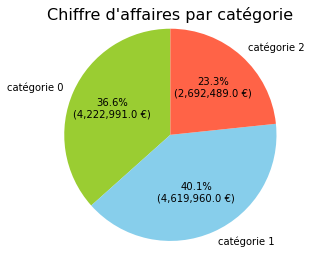

In [5]:
# On calcul le chiffre d'affaire pour chaque catégorie
df_ca_categ = df_4clients_in.groupby('categ').price.sum()

# Création du digramme circulaire
liste = [df_ca_categ[0], df_ca_categ[1], df_ca_categ[2]]
labels = ['catégorie 0', 'catégorie 1', 'catégorie 2']
colors = ['yellowgreen', 'skyblue', 'tomato']

# On définit une fonction qui permet d'afficher le pourcentage et le chiffre d'affaire sur le diagramme.
def func(pct):
    total_values = round(df_ca_categ.sum())
    return "{:.1f}%\n({:,} €)".format(pct, round(pct*total_values/100, 0))

plt.title("Chiffre d'affaires par catégorie", fontsize=16)
plt.pie(liste, labels = labels, autopct = func, colors = colors, startangle = 90, radius = 1.22)
plt.show()

#### Evolution du chiffre d'affaires dans le temps (mois) <a class="anchor" id="section_2_1_4"></a>

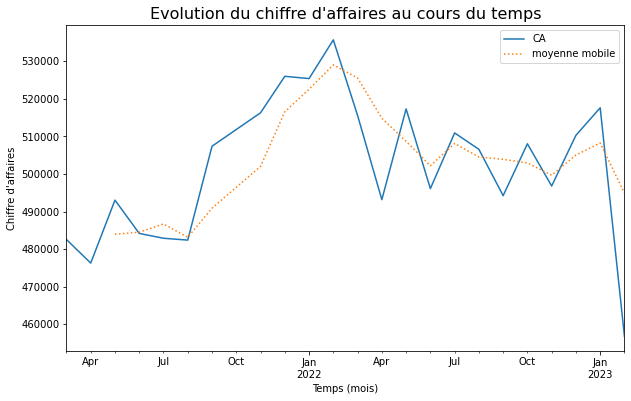

In [6]:
ca_mois = ca_mois.set_index('date')

# Création du diagramme
plt.figure(figsize=(10, 6))

ca_mois.CA.plot(label='CA') # chiffre d'affaires
ca_mois.CA.rolling(window=3).mean().plot(label='moyenne mobile', ls=':') # moyenne mobile sur le chiffre d'affaires

plt.title("Evolution du chiffre d'affaires au cours du temps", fontsize= 16)
plt.xlabel("Temps (mois)")
plt.ylabel("Chiffre d'affaires")
plt.legend()
plt.show()

Le chiffre d'affaires a tendance à augmenter d'août 2021 à février 2022 puis à diminuer et se stabiliser ensuite jusqu'en janvier 2023. Mais on observe une diminution importante du chiffre d'affaires au mois de février 2023.

#### Evolution du chiffre d'affaires dans le temps (jour)

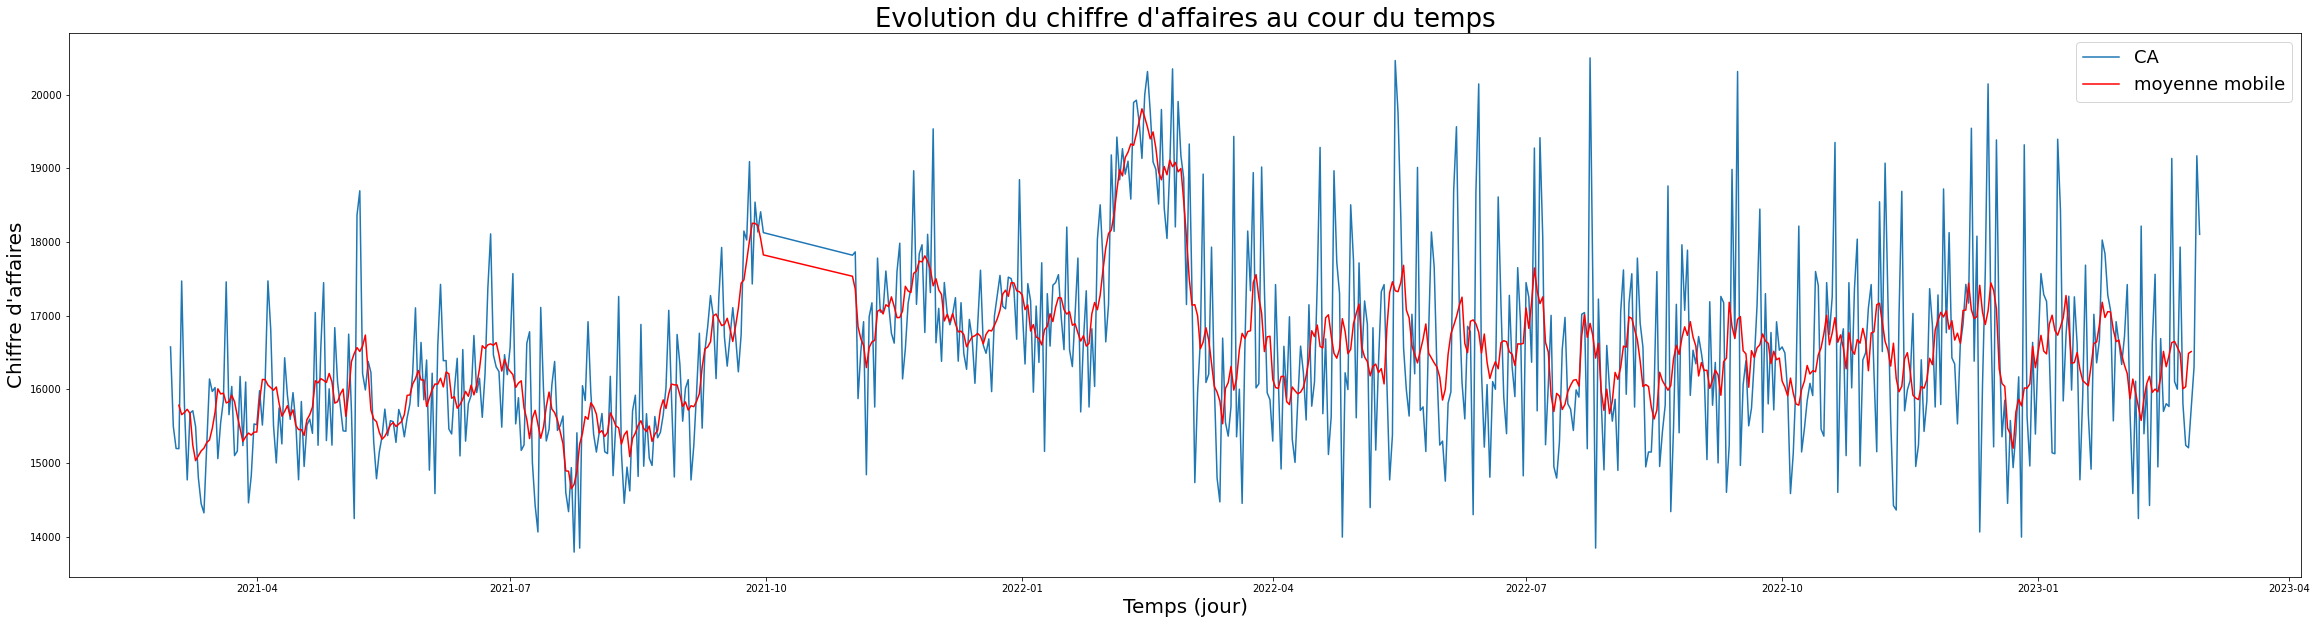

In [7]:
# Calcul du chiffre d'affaires par jour
df_ca_jour = df_4clients_in.groupby(df_4clients_in['date'].dt.date).price.sum().reset_index(name ='CA')
df_ca_jour = df_ca_jour.set_index('date')

# Création du diagramme
plt.figure(figsize=(40, 10))
df_ca_jour.CA.plot(label='CA')
df_ca_jour.CA.rolling(window=7, center=True).mean().plot(label='moyenne mobile', color="r")

plt.title("Evolution du chiffre d'affaires au cour du temps", fontsize= 26)
plt.xlabel("Temps (jour)", fontsize= 20)
plt.ylabel("Chiffre d'affaires", fontsize= 20)
plt.legend(prop={'size': 18})
plt.show()

On observe un chiffre d'affaires plus élevé sur le mois de février 2022.  
La variabilité du chiffre d'affaires semble augmenter à partir de mars 2022.  
La partie de la courbe en forme de droite pour octobre 2021 est dû à l'absence de données sur ce mois.

On décide de comparer les coefficients de variation avant septembre 2021 et après mars 2022.

In [8]:
# On sélectionne les chiffre d'affaires pour la période avant sept 2021
df = df_4clients_in.loc[df_4clients_in['date'].dt.to_period("M") < '2021-09']
df = df.groupby(df['date'].dt.date).price.sum().reset_index(name ='CA')

# Calul du coefficient de variation
coeff = (df.CA.describe()[2]/df.CA.describe()[1])*100

print("coeff variation à gauche:", round(coeff, 2), "%")

# On sélectionne les chiffre d'affaires pour la période après mars 2022
df2 = df_4clients_in.loc[df_4clients_in['date'].dt.to_period("M") > '2022-03']
df2 = df2.groupby(df2['date'].dt.date).price.sum().reset_index(name ='CA')

# Calul du coefficient de variation
coeff2 = (df2.CA.describe()[2]/df2.CA.describe()[1])*100

print("coeff variation à droite:", round(coeff2, 2), "%")

coeff variation à gauche: 5.2 %
coeff variation à droite: 7.81 %


On observe à partir de mars 2022 une variabilité plus importante du chiffre d'affaires.

### Les produits <a class="anchor" id="section_2_2"></a>

#### Les tops et les flops <a class="anchor" id="section_2_2_1"></a>

In [9]:
# Produits les plus vendus
tops = df_4clients_in["id_prod"].value_counts().sort_values(ascending=False).rename_axis('id_prod').reset_index(name='nbr_ventes')
liste = tops.id_prod[:10]
mask = products['id_prod'].isin(liste)
print("Produits les plus vendus:")
products.loc[mask]

Produits les plus vendus:


,id_prod,price,categ
741,1_403,17.99,1
1041,1_425,16.99,1
1326,1_407,15.99,1
1550,1_406,24.81,1
2200,1_417,20.99,1
2218,1_414,23.83,1
2588,1_412,16.65,1
2647,1_369,23.99,1
2887,1_498,23.37,1
3241,1_413,17.99,1


On note que les 10 produits les mieux vendus sont tous de catégorie 1.

In [10]:
# Produits les moins vendus
flops = tops.sort_values('nbr_ventes')
liste = flops.id_prod[:10]
mask = products['id_prod'].isin(liste)
print("Produits les moins vendus:")
products.loc[mask]

Produits les moins vendus:


,id_prod,price,categ
1166,0_980,31.06,0
1372,0_1151,2.99,0
1808,0_1533,27.99,0
1812,0_898,1.27,0
2505,0_549,2.99,0
2672,0_1683,2.99,0
2716,0_1498,2.48,0
2813,0_1601,1.99,0
2832,0_1284,1.38,0
3088,2_98,149.74,2


In [11]:
# Produits qui ne se sont pas vendus
print("Produits qui ne se sont pas vendus:")
df_products_nosale

Produits qui ne se sont pas vendus:


,id_prod,price,categ
0,0_1016,35.06,0
1,0_1780,1.67,0
2,0_1062,20.08,0
3,0_1119,2.99,0
4,0_1014,1.15,0
5,1_0,31.82,1
6,0_1318,20.92,0
7,0_1800,22.05,0
8,0_1645,2.99,0
9,0_322,2.99,0


#### Nombre de ventes par catégorie <a class="anchor" id="section_2_2_2"></a>

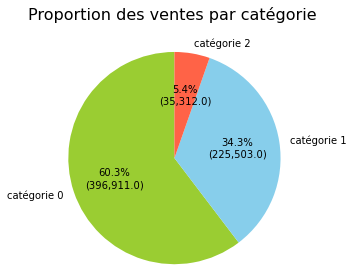

In [12]:
# On compte le nombre de ventes par catégorie
categ_ventes = df_4clients_in['categ'].value_counts()

# Création du digramme circulaire
liste = [categ_ventes[0], categ_ventes[1], categ_ventes[2]]
labels = ['catégorie 0', 'catégorie 1', 'catégorie 2']
colors = ['yellowgreen', 'skyblue', 'tomato']

# On définit une fonction qui permet d'afficher le pourcentage et le chiffre d'affaire sur le diagramme.
def func(pct):
    total_values = round(categ_ventes.sum())
    return "{:.1f}%\n({:,})".format(pct, round(pct*total_values/100, 0))

plt.title("Proportion des ventes par catégorie ", fontsize=16, pad=30)
plt.pie(liste, labels = labels, autopct = func, colors = colors, startangle = 90, radius = 1.22)
plt.show()

La plus grosse partie des ventes (60.3 %) est réalisée sur les produits de catégorie 0.

#### Calcul du prix moyen par catégorie 

In [13]:
# Calcul du prix moyen par catégorie
prix_moyen_categ = products.groupby(['categ']).price.mean()

# On affiche les prix moyens
print("Prix moyen par catégorie:")
print("   ")
print(" Catégorie 0 :", round(prix_moyen_categ[0], 2), "€", "\n",
      "Catégorie 1 :", round(prix_moyen_categ[1], 2), "€", "\n",
      "Catégorie 2 :", round(prix_moyen_categ[2], 2), "€")


Prix moyen par catégorie:
   
 Catégorie 0 : 11.73 € 
 Catégorie 1 : 25.53 € 
 Catégorie 2 : 108.35 €


On observe que plus le prix moyen de la catégorie est bas, plus le nombre de ventes de cette catégorie est élevé.

#### Répartition des produits entre les clients <a class="anchor" id="section_2_2_3"></a>

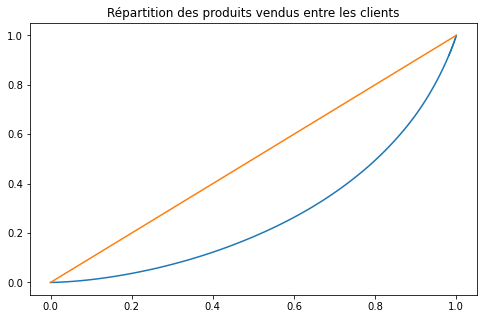

In [14]:
# On compte le nombre de produits vendus par client
df_produits_clients = df_final.groupby(df_final['client_id']).id_prod.count().reset_index(name ='nbr_produits')
prdt = df_produits_clients.nbr_produits
n = len(prdt)

# On tri les valeurs par ordre croissant, on fait la somme cummulée et on normalise en divisant par prdt.sum()
lorenz = np.cumsum(np.sort(prdt)) / prdt.sum()
lorenz = np.append([0],lorenz) # lorenz contient les ordonnées pour chaques points

# On crée les abscisses pour chaque points
xaxis = np.linspace(0-1/n,1+1/n,n+1)

# On trace la courbe de Lorenz et la première bissectrice
plt.figure(figsize=(8, 5))
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot([0,1], [0,1]) #tracer la bisséctrice
plt.title("Répartition des produits vendus entre les clients")
plt.show()

In [15]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz
surface = 0.5 - AUC # On calcul la surface entre la première bissectrice et la courbe de Lorenz
gini = 2*surface
print("Indice de gini:", round(gini, 3))

Indice de gini: 0.462


Les produits sont répartis de manière plutôt égalitaire entre les clients (indice de Gini plus proche de 0 que de 1). 20% des clients ont acheté environ 50% des produits.

#### Répartition du chiffre d'affaires entre les produits <a class="anchor" id="section_2_2_4"></a>

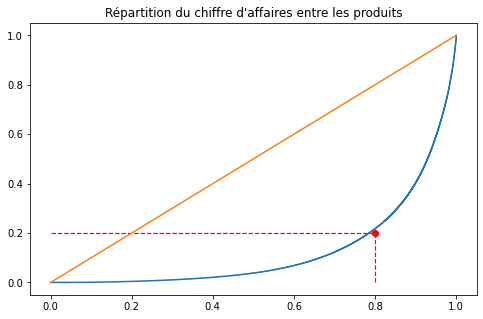

In [16]:
# On calcul le chiffre d'affaires par produits
df_ca_produits = df_final.groupby(df_final['id_prod']).price.sum().reset_index(name ='CA')
ca = df_ca_produits.CA
n = len(ca)

# On tri les valeurs par ordre croissant, on fait la somme cummulée et on normalise en divisant par ca.sum()
lorenz = np.cumsum(np.sort(ca)) / ca.sum()
lorenz = np.append([0],lorenz) 

# On crée les abscisses pour chaque points
xaxis = np.linspace(0-1/n,1+1/n,n+1)

# On trace la courbe de Lorenz et la première bissectrice
plt.figure(figsize=(8, 5))
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.vlines(0.8, 0, 0.2, linestyle="dashed", color="r",  linewidth=1.2)
plt.hlines(0.2, 0, 0.8, linestyle="dashed", color="r",  linewidth=1.2)
plt.scatter(0.8, 0.2, zorder=2, color="r")
plt.plot([0,1], [0,1]) #tracer la bisséctrice
plt.title("Répartition du chiffre d'affaires entre les produits")
plt.show()

In [17]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz
surface = 0.5 - AUC # On calcul la surface entre la première bissectrice et la courbe de Lorenz
gini = 2*surface
print("Indice de gini:", round(gini, 3))

Indice de gini: 0.743


Répartition inégalitaire du chiffre d'affaires entre les produits. Effet Pareto, 20% des produits vendus sont responsables de 80% du chiffre d'affaires.

### Profils des clients <a class="anchor" id="section_2_3"></a>

#### Genre des clients <a class="anchor" id="section_2_3_1"></a>

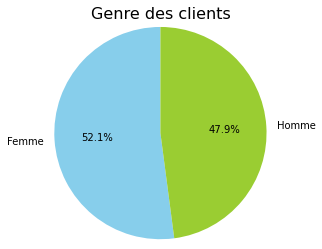

In [18]:
# On compte le nombre d'hommes et de femmes 
df_genre = df_final[['client_id', 'sex']].copy()
df_genre.drop_duplicates(inplace=True)
genre = df_genre['sex'].value_counts()

# Création du diagramme circulaire
liste = [genre[0], genre[1]]
labels = ['Femme', 'Homme']
colors = ['skyblue', 'yellowgreen']

plt.title("Genre des clients", fontsize=16)
plt.pie(liste, labels = labels, autopct = '%1.1f%%', colors = colors, startangle = 90, radius = 1.22)
plt.show()

Il y a une majorité de femmes parmi les clients (52.1%).

#### Age des clients <a class="anchor" id="section_2_3_2"></a>

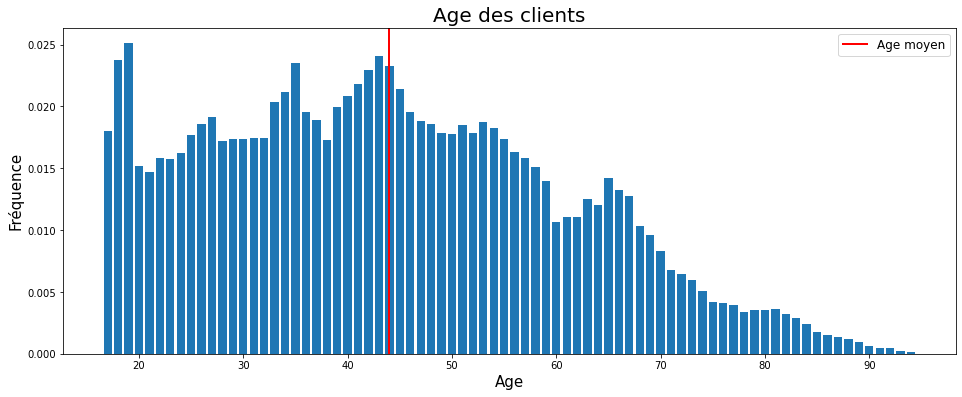

In [19]:
# On sélectionne l'age et les id_client
df_age = df_final[['client_id', 'Age']].copy()
df_age.drop_duplicates(inplace=True)

# Calcul de l'age moyen
age_moyen = df_age['Age'].mean()

# On calcul la fréquence d'apparition pour chaque age
df_age2 = df_age['Age'].value_counts(normalize=True).rename_axis('Age').reset_index(name='Fréquence').sort_values('Age')

# Représentation barplot de la variable Age
plt.figure(figsize=(16, 6))
plt.bar(df_age2['Age'], df_age2['Fréquence'])
plt.axvline(age_moyen, color='r', linewidth=2, label="Age moyen")
plt.title("Age des clients", fontsize=20)
plt.xlabel("Age", fontsize=15)
plt.ylabel("Fréquence", fontsize=15)
plt.legend(prop={'size': 12})
plt.show()

In [20]:
# On affiche l'âge moyen et l'écart-type
print("L'âge moyen des clients est de", round(df_age['Age'].mean(), 1),"ans avec un écart-type de", round(df_age['Age'].std(), 1))

L'âge moyen des clients est de 43.9 ans avec un écart-type de 16.8


#### Répartition du chiffre d'affaires entre les clients <a class="anchor" id="section_2_3_3"></a>

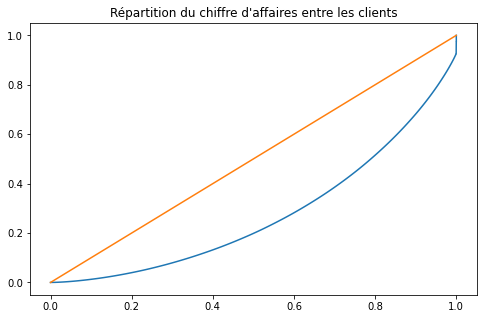

In [21]:
# On calcul le chiffre d'affaires par clients
df_ca_clients = df_4clients_in.groupby(df_4clients_in['client_id']).price.sum().reset_index(name ='CA')
ca = df_ca_clients.CA
n = len(ca)

# On tri les valeurs par ordre croissant, on fait la somme cummulée et on normalise en divisant par ca.sum()
lorenz = np.cumsum(np.sort(ca)) / ca.sum()
lorenz = np.append([0],lorenz) 

# On crée les abscisses pour chaque points
xaxis = np.linspace(0-1/n,1+1/n,n+1)

# On trace la courbe de Lorenz et la première bissectrice
plt.figure(figsize=(8, 5))
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot([0,1], [0,1]) #tracer la bisséctrice
plt.title("Répartition du chiffre d'affaires entre les clients")
plt.show()

In [22]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz
surface = 0.5 - AUC # On calcul la surface entre la première bissectrice et la courbe de Lorenz
gini = 2*surface
print("Indice de gini:", round(gini, 3))

Indice de gini: 0.447


Répartition du chiffre d'affaires sans les 4 gros clients.

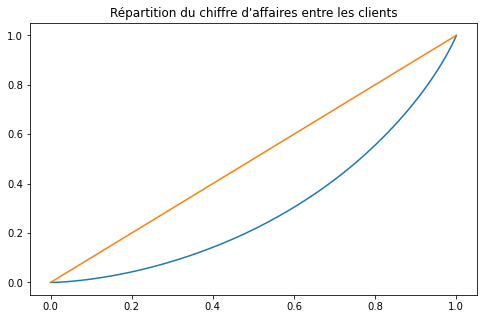

In [23]:
# On calcul le chiffre d'affaires par clients
df_ca_clients = df_final.groupby(df_final['client_id']).price.sum().reset_index(name ='CA')
ca = df_ca_clients.CA
n = len(ca)

# On tri les valeurs par ordre croissant, on fait la somme cummulée et on normalise en divisant par ca.sum()
lorenz = np.cumsum(np.sort(ca)) / ca.sum()
lorenz = np.append([0],lorenz) 

# On crée les abscisses pour chaque points
xaxis = np.linspace(0-1/n,1+1/n,n+1)

# On trace la courbe de Lorenz et la première bissectrice
plt.figure(figsize=(8, 5))
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot([0,1], [0,1]) #tracer la bisséctrice
plt.title("Répartition du chiffre d'affaires entre les clients")
plt.show()

In [24]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz
surface = 0.5 - AUC # On calcul la surface entre la première bissectrice et la courbe de Lorenz
gini = 2*surface
print("Indice de gini:", round(gini, 3))

Indice de gini: 0.404


En enlevant les 4 clients importants, on obtient logiquement une répartition plus égalitaire du chiffre d'affaires entre les clients. 80% de ces clients sont responsable de presque 60% du chiffre d'affaires.

## Demandes de Julie <a class="anchor" id="chapter3"></a>

### Genre d'un client X catégorie des livres achetés <a class="anchor" id="section_3_1"></a>

In [25]:
# Création d'un tableau de contingence
cont_table = pd.crosstab(df_final['sex'], df_final['categ'], margins=True, margins_name="Total")
cont_table

categ,0.0,1.0,2.0,Total
sex,,,,
f,192025,110550,16429,319004
m,178044,100227,15351,293622
Total,370069,210777,31780,612626


On souhaite représenter graphiquement nos variables à l'aide d'une heatmap de corrélation. Pour ce faire, nous allons comparer le tableau de contingence avec un tableau que l'on obtiendrait dans le cas d'une indépendance entre les variables.  
Et à partir de là, nous pourrons calculer la contribution de chaque case du tableau à la non-indépendance entre les variables.

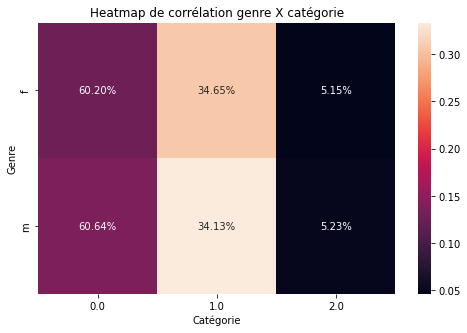

In [26]:
# Pour une meilleure compréhension, on calcule les pourcentages de chaque case du tableau par rapport au total femme ou homme
# et on les affichera sur la heatmap
f = df_final['sex'].value_counts()[0]
h = df_final['sex'].value_counts()[1]

df_percentage = df_final.groupby('categ')['sex'].value_counts().reset_index(name='effectif')
df_percentage['total_sex'] = [f, h, f, h, f, h]
df_percentage['pourcentage_sex'] = (df_percentage['effectif']/df_percentage['total_sex'])

# On stocke les données dans un tableau et on les affichera ensuite sur la heatmap
annot_arr = np.array([[df_percentage['pourcentage_sex'][0],df_percentage['pourcentage_sex'][2],df_percentage['pourcentage_sex'][4]],
                     [df_percentage['pourcentage_sex'][1],df_percentage['pourcentage_sex'][3],df_percentage['pourcentage_sex'][5]]
                    ]) 

# Calcul du tableau indep qui représente le cas d'indépendance des variables
tx = cont_table.loc[:,["Total"]]
ty = cont_table.loc[["Total"],:]
n = len(df_final)
indep = tx.dot(ty) / n

# On compare les valeurs des tableaux cont_table et indep en faisant la différence
measure = (cont_table-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n # On calcule la contribution à la non-indépendance (comprise entre 0 et 1) et qui servira à étalonner la couleur

# Création de la heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(table.iloc[:-1,:-1],annot=annot_arr, fmt=".2%")
plt.xlabel("Catégorie")
plt.ylabel("Genre")
plt.title("Heatmap de corrélation genre X catégorie")
plt.show()

On observe d'après les pourcentages, qu'il y a une légère différence dans la répartition par catégorie entre les hommes et les femmes, il pourrait donc y avoir une dépendance. D'après le code couleur, c'est pour la catégorie 1 que la contribution à la dépendance serait la plus forte. 

#### On réalise un test du chi-2 pour determiner s'il existe une dépendance entre les variables  

On émet deux hypothèses:
-  H0: Les variables sont indépendantes.
-  H1: Il y a une dépendance entre la catégorie de produits et le genre.

In [27]:
# Tableau de contingence
cont_table = pd.crosstab(df_final['sex'], df_final['categ'])
cont_table

categ,0.0,1.0,2.0
sex,,,
f,192025,110550,16429
m,178044,100227,15351


In [28]:
# Test du chi-2
test = stats.chi2_contingency(cont_table)
test

(18.75788251563821,
 8.448460261159054e-05,
 2,
 array([[192700.75262232, 109754.90120889,  16548.34616879],
        [177368.24737768, 101022.09879111,  15231.65383121]]))

On obtient une p-value inférieure à 0.05, on peut rejeter l'hypothèse nulle de la non-dépendance des variables.
On peut donc confirmer qu'il y a une corrélation entre le genre du client et la catégorie du produit acheté.

#### On calcule la force de la relation entre nos variables avec le test V de Cramer.

In [29]:
# On récupère les données pour le calcul du V de Cramer
chi2 = test[0]
n = df_final.shape[0]
dl = test[2]

# Calcul du V de Cramer
cramerV = np.sqrt(chi2/(n*dl))
print("V de Cramer:", cramerV)

V de Cramer: 0.003912723832796591


Le test V de Cramer nous donne une valeur proche de zéro, ce qui signifie que l'intensité de la relation entre le genre et la catégorie de produits achetés est très faible.

### Age des clients X montant total <a class="anchor" id="section_3_2"></a>

In [30]:
# On groupe par age des clients et on calcule le montant total des achats
df_age_montant = df_final.groupby('Age').price.sum().reset_index(name='montant total')
df_age_montant.head()

,Age,montant total
0,17,223666.370000
1,18,379228.400000
2,19,216501.672795
3,20,172978.705589
4,21,167650.712795


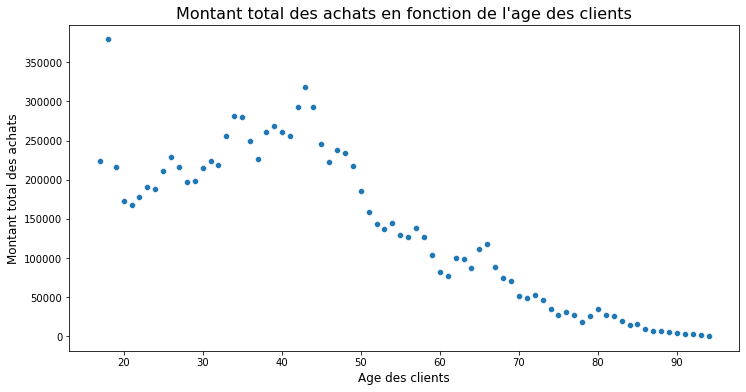

In [31]:
# Représentation en nuage de point du montant total en fonction de l'age
plt.figure(figsize=(12,6))
sns.scatterplot(x = 'Age', y = 'montant total', data= df_age_montant)

plt.title("Montant total des achats en fonction de l'age des clients", fontsize= 16)
plt.xlabel("Age des clients", fontsize= 12)
plt.ylabel("Montant total des achats", fontsize= 12)
plt.show()

#### Test de normalité des variables

On émet deux hypothèses:

H0: la variable est normalement distribuée.  
H1: la variable n'est pas normalement distribuée.

In [32]:
# Test de Shapiro-Wilk
print("Montant total")
print(stats.shapiro(df_age_montant['montant total']))
print("Age")
print(stats.shapiro(df_age_montant['Age']))

Montant total
ShapiroResult(statistic=0.9334965348243713, pvalue=0.0005250321701169014)
Age
ShapiroResult(statistic=0.9548978209495544, pvalue=0.0076097710989415646)


Les pvalue sont inférieures à 0.05, on peut rejeter l'hypothèse H0 de normalité. Les distributions ne suivent pas une loi normale.  

On décide alors de réaliser un test non paramétrique (Test de Spearman)

#### Test de corrélation de Spearman

Hypothèses:
-  H0: le montant total des achats n'est pas corrélé à l'âge des clients.
-  H1: Il y une corrélation entre le montant total des achats et l'âge des clients.

In [33]:
# Test de Spearman
stats.spearmanr(df_age_montant)

SpearmanrResult(correlation=-0.8793105628548666, pvalue=3.386263610447e-26)

La pvalue est inférieure au seuil de 0.05, on rejette l'hypothèse H0 de non-corrélation. Il y a un donc un lien entre les variables âge et montant total.
Cette corrélation est négative avec un coefficient de Spearman de -0.88, le montant total a tendance à diminuer avec l'augmentation de l'âge des clients.

### Age des clients X fréquence d'achat <a class="anchor" id="section_3_3"></a>

In [34]:
# On calcule le nombre de jour entre les dates min et max de transaction
nbr_jour = df_final['date'].dt.date.max() - df_final['date'].dt.date.min()
print(nbr_jour)

729 days, 0:00:00


In [35]:
# On commence par calculer le nombre d'achat moyen pour chaque âge
df_frequence = df_final.groupby(['Age', 'client_id'])['client_id'].count().reset_index(name='nbr_achat')
df_frequence = df_frequence.groupby('Age')['nbr_achat'].mean().reset_index(name='nbr_achat')

# Ensuite on calcule la fréquence d'achat en divisant par le nombre de mois
df_frequence['frequence'] = df_frequence['nbr_achat']/(729/30)
df_frequence.head()

,Age,nbr_achat,frequence
0,17,12.770115,0.525519
1,18,16.555749,0.681307
2,19,8.714992,0.358642
3,20,11.828338,0.486763
4,21,11.769663,0.484348


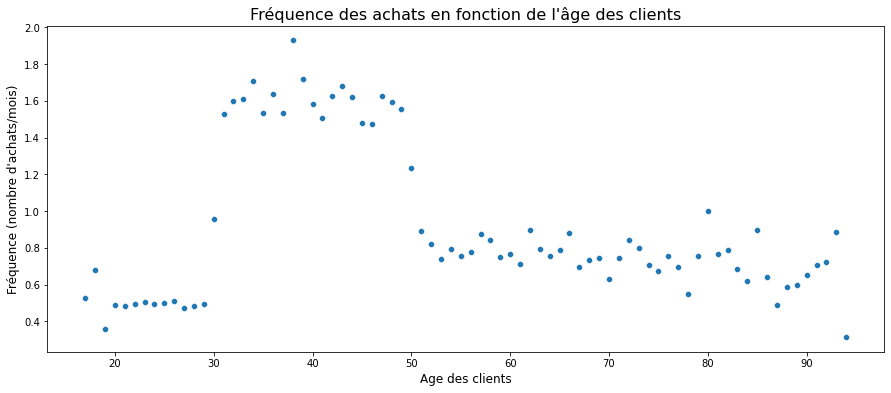

In [36]:
# Représentation en nuage de point de la fréquence d'achat en fonction de l'âge
plt.figure(figsize=(15,6))
sns.scatterplot(x = 'Age', y = 'frequence', data= df_frequence)

plt.title("Fréquence des achats en fonction de l'âge des clients", fontsize= 16)
plt.xlabel("Age des clients", fontsize= 12)
plt.ylabel("Fréquence (nombre d'achats/mois)", fontsize= 12)
plt.show()

On distingue sur le diagramme ci-dessus, 3 comportements différents correspondants à certaines tranches d'âge.  

Pour déterminer s'il y a un lien entre les variables, on découpe les âges en tranches et on compare les distributions de fréquences pour ces tranches d'âge.

In [37]:
# Création d'une colonne 'age_range'
df_frequence['age_range'] = pd.cut(x=df_frequence['Age'], bins=[16, 30, 50, 95])
df_frequence.head()

,Age,nbr_achat,frequence,age_range
0,17,12.770115,0.525519,"(16, 30]"
1,18,16.555749,0.681307,"(16, 30]"
2,19,8.714992,0.358642,"(16, 30]"
3,20,11.828338,0.486763,"(16, 30]"
4,21,11.769663,0.484348,"(16, 30]"


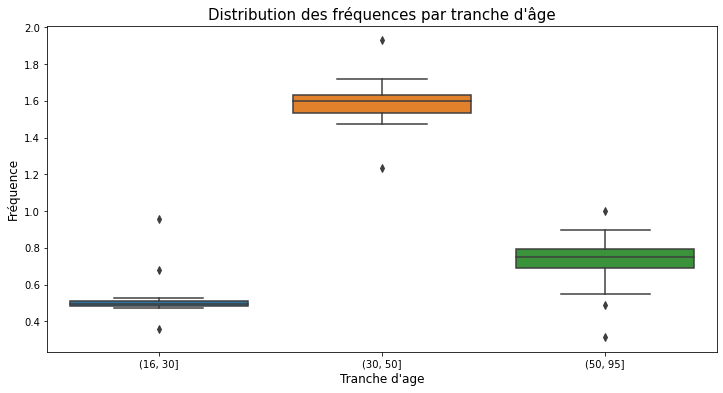

In [38]:
# Représentation en boîte à moustache des fréquences pour chaque tranches d'âge
plt.figure(figsize=(12, 6))
df = df_frequence[['age_range', 'frequence']].copy()

sns.boxplot(x='age_range', y='frequence', data=df, orient='v')
plt.title("Distribution des fréquences par tranche d'âge", fontsize=15)
plt.xlabel("Tranche d'age", fontsize=12)
plt.ylabel("Fréquence", fontsize=12)
plt.show()

#### Test de normalité des distributions de fréquences

Hypothèses:

H0: la variable est normalement distribuée.  
H1: la variable n'est pas normalement distribuée.

In [39]:
# On change le type de la variable 'age_range' en objet string
df['age_range'] = df['age_range'].astype(str)

# On sélectionne les distributions de fréquence pour chaque tranche d'âge
df_tranche1 = df.loc[df['age_range'] == '(16, 30]']['frequence']
df_tranche2 = df.loc[df['age_range'] == '(30, 50]']['frequence']
df_tranche3 = df.loc[df['age_range'] == '(50, 95]']['frequence']

# On vérifie si ces distributions suivent une loi normale à l'aide du test de Shapiro-Wilk
print("tranche1")
print(stats.shapiro(df_tranche1))
print(" ")
print("tranche2")
print(stats.shapiro(df_tranche2))
print(" ")
print("tranche3")
print(stats.shapiro(df_tranche3))

tranche1
ShapiroResult(statistic=0.6427847146987915, pvalue=0.00010025859955931082)
 
tranche2
ShapiroResult(statistic=0.9075835347175598, pvalue=0.05733446776866913)
 
tranche3
ShapiroResult(statistic=0.9429855942726135, pvalue=0.030338171869516373)


Une seule pvalue est supérieure à 0.05, pour les deux autres distributions l'hypothèse nulle est rejetée. Les distributions de fréquences de ces groupes ne suivent pas tous une loi normale.  

Nous devons donc utiliser un test non-paramétrique pour tester si les distributions de nos trois groupes sont identiques ou différentes.

#### Test non-paramétrique de Kruskal-Wallis

Hypothèses:
-  H0: Les médianes sont identiques entre tous les groupes
-  H1: Les médianes sont différentes entre les groupes

In [40]:
# Test de Kruskal-Wallis
stats.kruskal(df_tranche1, df_tranche2, df_tranche3)

KruskalResult(statistic=54.263103984622944, pvalue=1.6478462358037195e-12)

La p value est inférieure à 0.05, on rejette l'hypothèse nulle. Il y a une différence statistiquement significative entre nos groupes.

Ainsi on peut dire qu'il y a une corrélation entre la fréquence d'achat et l'âge du client. Par exemple les clients entre 30 et 50 ans achètent plus fréquemment que les autres.

### Age des clients X panier moyen <a class="anchor" id="section_3_4"></a>

In [41]:
# Calcul du nombre d'achat réalisé par session pour chaque âge
df_age_panier = df_final.groupby(['Age', 'session_id']).price.sum().reset_index(name='montant panier')
df_age_panier = df_age_panier.groupby(['Age'])['montant panier'].mean().reset_index(name='panier moyen')
df_age_panier.head()

,Age,panier moyen
0,17,70.960143
1,18,70.253501
2,19,71.217656
3,20,70.431069
4,21,70.679053


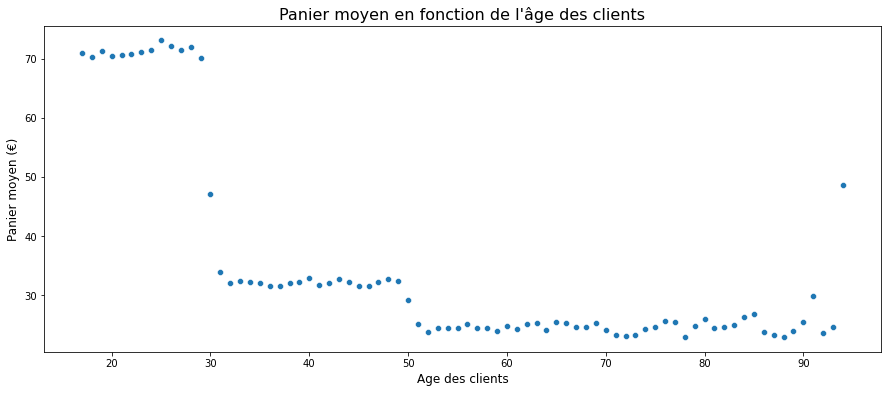

In [42]:
# Représentation en nuage de point du panier moyen en fonction de l'âge
plt.figure(figsize=(15,6))
sns.scatterplot(x = 'Age', y = 'panier moyen', data= df_age_panier)

plt.title("Panier moyen en fonction de l'âge des clients", fontsize= 16)
plt.xlabel("Age des clients", fontsize= 12)
plt.ylabel("Panier moyen (€)", fontsize= 12)
plt.show()

On représente avec des tranches d'âge.

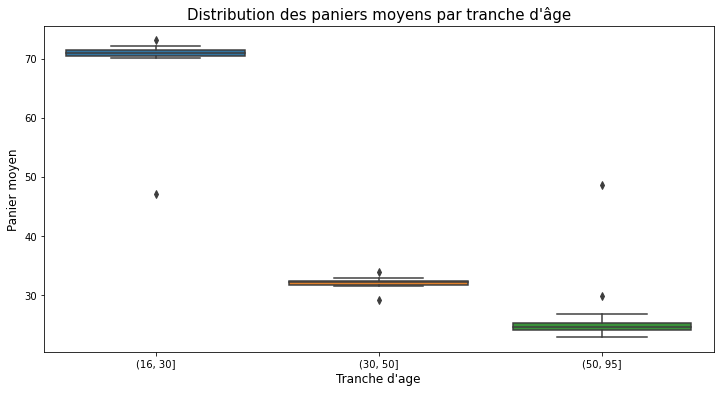

In [43]:
df_age_panier['age_range'] = pd.cut(x=df_age_panier['Age'], bins=[16, 30, 50, 95])
df_age_panier.head()

# Représentation en boîte à moustache des panier moyen pour chaque tranches d'âge
plt.figure(figsize=(12, 6))
df = df_age_panier[['age_range', 'panier moyen']].copy()

sns.boxplot(x='age_range', y='panier moyen', data=df, orient='v')
plt.title("Distribution des paniers moyens par tranche d'âge", fontsize=15)
plt.xlabel("Tranche d'age", fontsize=12)
plt.ylabel("Panier moyen", fontsize=12)
plt.show()

#### Test de normalité des distributions de panier moyen

Hypothèses:

H0: la variable est normalement distribuée.  
H1: la variable n'est pas normalement distribuée.

In [44]:
# On change le type de la variable 'age_range' en objet string
df['age_range'] = df['age_range'].astype(str)

# On sélectionne les distributions de panier moyen pour chaque tranche d'âge
df_tranche1 = df.loc[df['age_range'] == '(16, 30]']['panier moyen']
df_tranche2 = df.loc[df['age_range'] == '(30, 50]']['panier moyen']
df_tranche3 = df.loc[df['age_range'] == '(50, 95]']['panier moyen']

# On vérifie si ces distributions suivent une loi normale à l'aide du test de Shapiro-Wilk
print("tranche1")
print(stats.shapiro(df_tranche1))
print(" ")
print("tranche2")
print(stats.shapiro(df_tranche2))
print(" ")
print("tranche3")
print(stats.shapiro(df_tranche3))

tranche1
ShapiroResult(statistic=0.41430801153182983, pvalue=1.3540109193854732e-06)
 
tranche2
ShapiroResult(statistic=0.834452748298645, pvalue=0.0029581168200820684)
 
tranche3
ShapiroResult(statistic=0.3736107349395752, pvalue=1.84697374581988e-12)


Les pvalue des trois groupes sont inférieures au seuil de 0.05. On rejette l'hypothèse H0, les distributions de paniers moyens de ces groupes ne suivent pas une loi normale.

#### Test non-paramétrique de Kruskal-Wallis

Hypothèses:

H0: Les médianes sont identiques entre tous les groupes  
H1: Les médianes sont différentes entre les groupes

In [45]:
# Test Kruskall-Wallis
stats.kruskal(df_tranche1, df_tranche2, df_tranche3)

KruskalResult(statistic=58.701307553206334, pvalue=1.79131938032375e-13)

La p value est inférieure à 0.05, on rejette l'hypothèse nulle. 
Il y a une différence statistiquement significative entre nos groupes.  

Ainsi on peut dire qu'il y a une corrélation entre la taille du panier moyen et l'âge du client. Les clients entre 16 et 30 ans ont tendance à avoir un montant de panier plus élevé que les autres.

### Age des clients X catégorie des livres achetés <a class="anchor" id="section_3_5"></a>

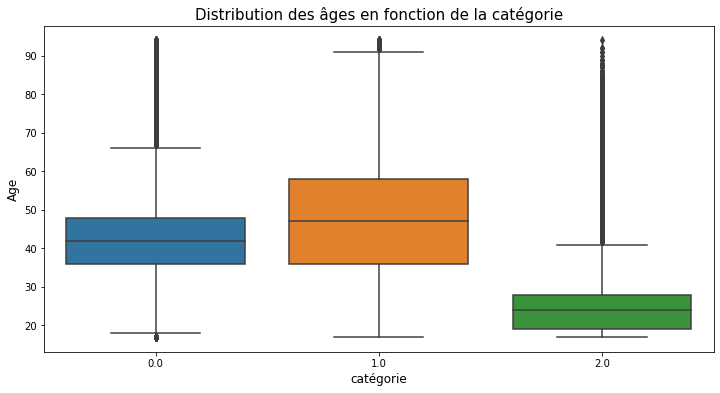

In [46]:
# Représentation en boîte à moustache des âges pour chaque catégorie
plt.figure(figsize=(12, 6))

sns.boxplot(x='categ', y='Age', data=df_final, orient='v')
plt.title("Distribution des âges en fonction de la catégorie", fontsize=15)
plt.xlabel("catégorie", fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.show()

#### Test de normalité des distributions d'âge

Hypothèses:

H0: la variable est normalement distribuée.  
H1: la variable n'est pas normalement distribuée.

In [47]:
# On sélectionne les distributions d'Age pour chaque catégorie
df_age_categ0 = df_final.loc[df_final['categ'] == 0]['Age']
df_age_categ1 = df_final.loc[df_final['categ'] == 1]['Age']
df_age_categ2 = df_final.loc[df_final['categ'] == 2]['Age']

# On vérifie si ces distributions suivent une loi normale à l'aide du test de Kolmogorov-Smirnov
print("tranche1")
print(stats.kstest(df_age_categ0, 'norm'))
print(" ")
print("tranche2")
print(stats.kstest(df_age_categ1, 'norm'))
print(" ")
print("tranche3")
print(stats.kstest(df_age_categ2, 'norm'))

tranche1
KstestResult(statistic=1.0, pvalue=0.0)
 
tranche2
KstestResult(statistic=1.0, pvalue=0.0)
 
tranche3
KstestResult(statistic=1.0, pvalue=0.0)


Les pvalue des trois groupes sont inférieures au seuil de 0.05. Les distributions d'âge de ces groupes ne suivent pas une loi normale.

#### Test non-paramétrique (Kruskal-Wallis)

Hypothèses:

H0: Les médianes sont identiques entre tous les groupes  
H1: Les médianes sont différentes entre les groupes

In [48]:
# Test Kruskall-Wallis
stats.kruskal(df_age_categ0, df_age_categ1, df_age_categ2)

KruskalResult(statistic=69885.075348206, pvalue=0.0)

La p value est inférieure à 0.05, on rejette l'hypothèse nulle. 
Il y a une différence statistiquement significative entre nos groupes.  

Ainsi on peut dire qu'il y a une corrélation entre l'âge du client et la catégorie de livre achetée. Les clients jeunes ont tendance à acheter plus de produits de catégorie 2, catégorie qui a le prix moyen le plus élevé.

##### En pratique il est possible d'appliquer tout de même le test paramétrique ANOVA en raison de la grande taille des échantillons. En effet, si on considère de grands échantillons, on peut supposer la normalité de leurs distributions. 

Hypothèses:

H0: Il n'y a pas de différence significative entre tous les groupes  
H1: Il y a une différence significative entre les groupes

In [49]:
# Test ANOVA
stats.f_oneway(df_age_categ0, df_age_categ1, df_age_categ2)

F_onewayResult(statistic=39005.062085784964, pvalue=0.0)

À nouveau la pvalue est inférieure à 0.05, on rejette l'hypothèse H0. Il y a une différence significative entre nos groupes et il y a donc une corrélation entre les variables.

### Chiffre d'affaires X Genre d'un client <a class="anchor" id="section_3_6"></a>

In [50]:
df_genre_CA = df_final.groupby(['sex', 'client_id']).price.sum().reset_index(name='CA')
df_genre_CA.head()

,sex,client_id,CA
0,f,c_1000,2209.92
1,f,c_1002,326.19
2,f,c_1005,827.98
3,f,c_1007,413.32
4,f,c_1009,513.82


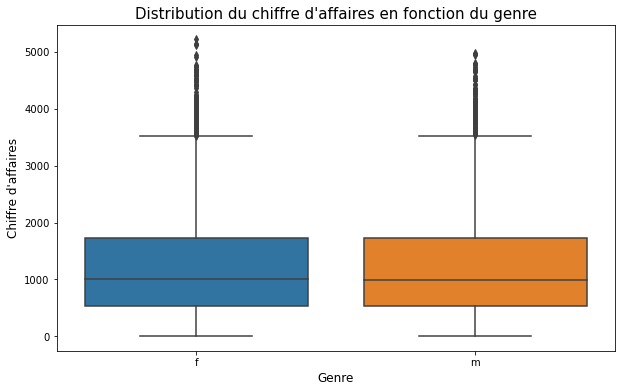

In [51]:
# Représentation en boîte à moustache des chiffre d'affaires pour chaque genre
plt.figure(figsize=(10, 6))

sns.boxplot(x='sex', y='CA', data=df_genre_CA, orient='v')
plt.title("Distribution du chiffre d'affaires en fonction du genre", fontsize=15)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Chiffre d'affaires", fontsize=12)
plt.show()

On souhaite tester s'il y a une différence significative entre ces deux distributions.
Il est possible de réaliser un test de Student mais pour cela il faut respecter certaines conditions:  

-  la variable chiffre d'affaires suit une loi normale
-  les variances des deux groupes sont égales

#### Test de normalité de la variable CA

Hypothèses:

H0: la variable est normalement distribuée.  
H1: la variable n'est pas normalement distribuée.

In [52]:
# On sélectionne les distribution de chiffre d'affaires des deux genres
df_CA_femme = df_genre_CA.loc[df_genre_CA['sex'] == 'f']['CA']
df_CA_homme = df_genre_CA.loc[df_genre_CA['sex'] == 'm']['CA']

# Tests de Kolmogorov-Smirnov
print("CA femme")
print(stats.kstest(df_CA_femme, 'norm'))
print(" ")
print("CA homme")
print(stats.kstest(df_CA_homme, 'norm'))

CA femme
KstestResult(statistic=1.0, pvalue=0.0)
 
CA homme
KstestResult(statistic=1.0, pvalue=0.0)


Les pvalue sont inférieures à 0.05, la variable CA ne suit donc pas une distribution normale pour les deux groupes.

#### Test d'égalité des variances

#### Test de Levene 

Hypothèses:

H0: Les variances des deux groupes sont égales   
H1: Les variances ne sont pas égales

In [53]:
# Test de Levene
stats.levene(df_CA_femme, df_CA_homme, center='median', proportiontocut=0.05)

LeveneResult(statistic=0.05669497225813222, pvalue=0.8118037366518309)

La pvalue est supérieure au seuil de 0.05, on ne peut pas rejeter l'hypothèse H0. Il y a égalité des variances entre les deux groupes.  

Nos données ne respectent qu'une seule des deux conditions nécessaires à la réalisation d'un test de Student. Nous utiliserons donc un test non-paramétrique.

#### Test non paramétrique de Mann-Whitney U 

Hypothèses:  

H0: Il n'y a pas de différence entre les deux groupes  
H1: Il y a une différence entre les deux groupes

In [54]:
# Test de Mann-Whitney U
stats.mannwhitneyu(df_CA_femme, df_CA_homme)

MannwhitneyuResult(statistic=9232221.5, pvalue=0.8883094300117109)

La pvalue est supérieure au seuil de 0.05, on ne peut pas rejeter l'hypothèse H0 de non différence entre les deux groupes.  
Ainsi, on peut dire qu'il n'y a pas de lien significatif entre le genre d'un client et le chiffre d'affaires.

##### Ici également, en pratique on peut supposer la normalité de nos distributions pour les grands échantillons et appliquer ainsi le test paramétrique de Student.

#### Test de Student

Hypothèses:  

H0: Les moyennes des deux groupes sont égales  
H1: Les moyennes des deux groupes ne sont pas égales

In [55]:
# Test de Student
stats.ttest_ind(df_CA_femme, df_CA_homme, equal_var=True)

Ttest_indResult(statistic=-0.1332932602791531, pvalue=0.8939645791625097)

À nouveau la pvalue est supérieure à 0.05, on ne peut pas rejeter H0, il n'y a pas de différence entre les deux groupes.

## Conclusion <a class="anchor" id="chapter4"></a>

- 11856321 € de chiffre d'affaires ont été réalisés de mars 2021 à février 2023.  
La période entre décembre 2021 et février 2022 a été la plus prolifique.  

- On a 80% des clients qui correspondent à 60% du chiffre d'affaires.  

- Les meilleures ventes sont réalisées sur des produits de catégorie 1.  

- L'âge moyen des clients est de 44 ans environ.  

- Il existe une relation entre le genre du client et la catégorie de livre achetée mais celle-ci est très faible. 

- Le montant total diminue avec l'augmentation de l'âge des clients.

- Les clients entre 30 et 50 ans ont la fréquence d'achat la plus élevée.

- Les clients entre 17 et 30 ans ont tendance à acheter des produits plus chers et ont un panier moyen plus élevé que les autres clients.  


- Il serait intéressant de regarder en détail les produits qui ne se sont pas vendus, ainsi que les clients qui n'ont pas réalisé d'achats sur la période analysée.  
- Il faudrait aussi trouver la raison de l'absence de données sur les transactions de catégorie 1 au cours du mois d'octobre 2021.  
- Et enfin il faudrait analyser plus spécifiquement le mois de février 2023 pour expliquer cette chute du chiffre d'affaires.